# Sklearn intro

information from: https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/


Sklearn or Sci-kit learn is a machine learning package in python. Has a number of machine learning models that can be used based on the project that you may be working on.

For our project, we will be look into a Linear Regression model. This will be our initial base model and we can optimize and improve this model or shift onto a model that may be more accurate later on.

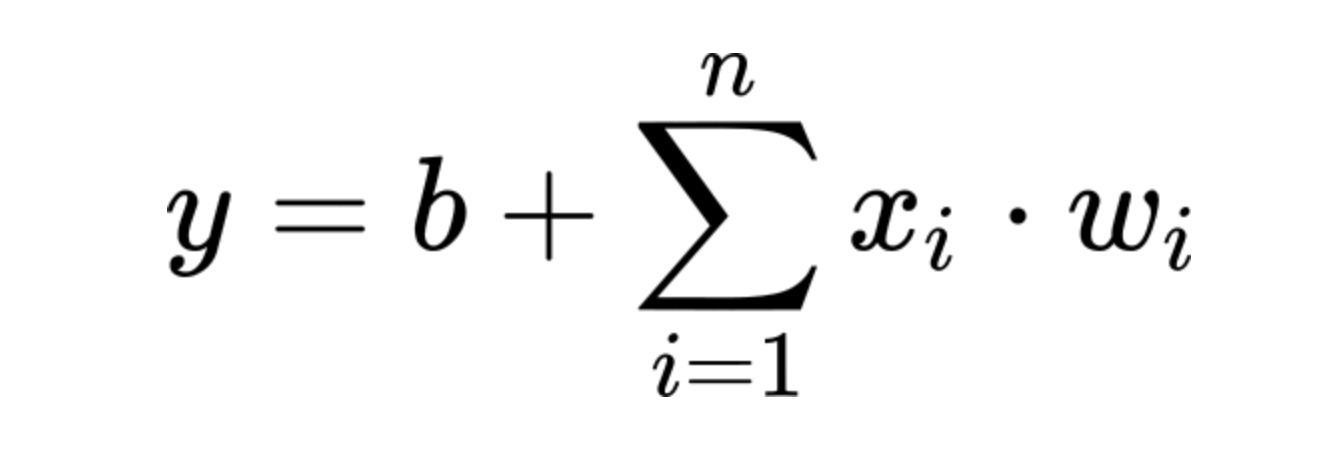

This is the formula for linear regression which is learned in DSC40A.

Linear regression = study the relationship between a single dependent variable Y and one or more independent variable X.

Multiple linear regresssion = linear regression with more than one variable.
For this algorithm, we want to minimize error, or minimize how wrong our linear prediction could be.

Reason why we are using a multiple linear regression model: CPI and PPI data trends are very similar and follow a similar trend so this allows us to use that relationship to predict future CPIs

## Sklearn linear regression

In [274]:
# import packages and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [275]:
CPI = pd.read_csv('/Users/zedsiyed/downloads/cpi_modeling/CPI_Data/Cleaned_CPI_data.csv')
PPI = pd.read_csv('/Users/zedsiyed/downloads/cpi_modeling/CPI_Data/PPI_data.csv')
CPI.index = pd.to_datetime(CPI.index, infer_datetime_format = True)
CPI = CPI.dropna(axis = 1)


CPI = CPI[CPI['Unnamed: 0'].str.contains("Percent")==False]
CPI = CPI.set_index('Unnamed: 0')

merged = CPI

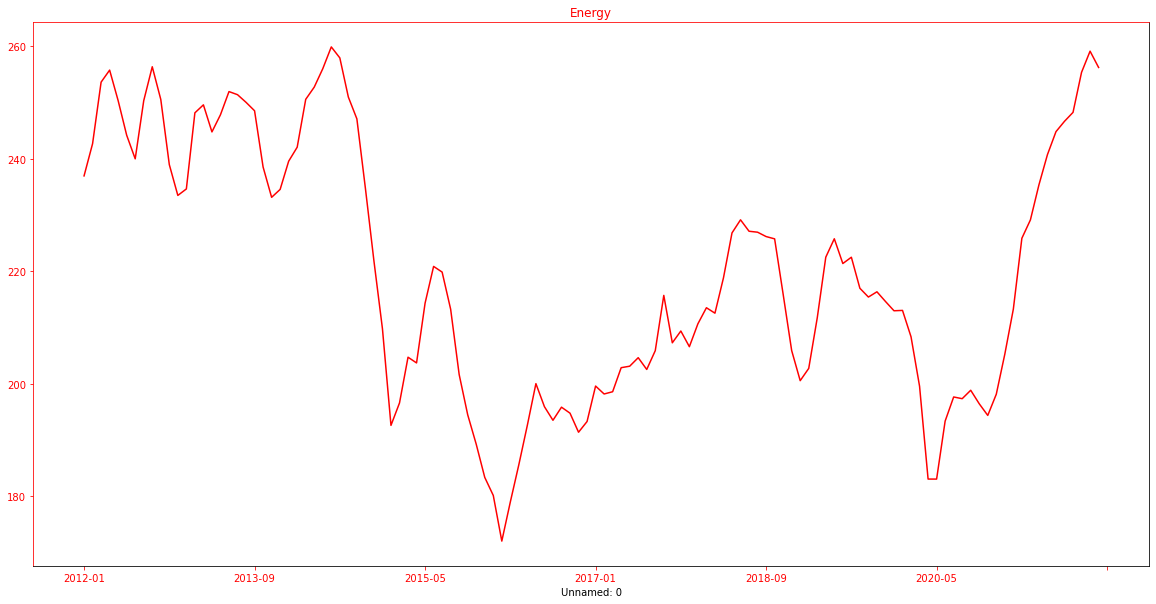

In [276]:
fig = merged['Energy'].plot(figsize = (20,10), color = 'r')
fig.yaxis.label.set_color('blue')          #setting up Y-axis label color to blue

fig.tick_params(axis='x', colors='red')    #setting up X-axis tick color to red
fig.tick_params(axis='y', colors='red')  #setting up Y-axis tick color to black

fig.spines['left'].set_color('red')        # setting up Y-axis tick color to red
fig.spines['top'].set_color('red')         #setting up above X-axis tick c
fig.set_title("Energy").set_color('red')

In [277]:
merged = merged.replace('2012-01',0) #could not convert string to float: '2012-01'

merged = merged.apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# remove energy related categories
x = merged.drop(['Household energy', 'Fuel oil', 'Fuel oil', 'Propane, kerosene, and firewood', 'Energy services', 'Electricity', 'Utility ',
'Fuel oil and other fuels', 'Motor fuel', 'Other motor fuels','Transportation commodities less motor fuel'
,'Energy', 'Energy commodities', 'Energy services', 'Fuels and utilities', 'Gasoline '], axis=1)


#separte the predicting attribute into Y for model training 
y = merged.get(['Energy'])

# manually split test and training data
x_train = x.iloc[:96]
x_test = x.iloc[96:]
y_train = y.iloc[:96]
y_test = y.iloc[96:]
# test train split 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
# y_train = np.ravel(y_train)
x_train

,Food,Food at home,Cereals and bakery products,Cereals and cereal products,Flour and prepared flour mixes,Breakfast cereal,"Rice, pasta, cornmeal",Bakery products,Bread,"Fresh biscuits, rolls, muffins",...,Medical care,Transportation,Private transportation,New and used motor vehicles,Utilities and public transportation,Household furnishings and operations,Other goods and services,Personal care,Recorded music and music subscriptions,"Men's underwear, nightwear, swimwear, and accessories"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2012-01,232.666,231.694,266.677,234.159,252.159,228.664,242.992,283.880,170.658,167.911,...,408.056,210.799,206.307,99.659,205.521,125.629,391.382,210.299,89.691,148.547
2012-02,232.486,231.180,267.821,233.362,250.564,227.984,242.217,286.484,172.978,168.364,...,410.466,214.429,210.013,99.889,205.398,126.180,391.236,210.330,89.896,148.183
2012-03,232.792,231.383,267.101,232.660,252.104,227.997,238.975,285.771,172.955,168.406,...,411.498,220.842,216.536,100.325,205.637,126.107,392.364,211.289,89.704,149.106
2012-04,233.234,231.711,268.014,233.662,252.102,228.862,240.693,286.589,173.559,166.211,...,412.480,223.083,218.563,100.977,206.050,126.114,393.320,211.865,89.084,150.584
2012-05,233.339,231.518,268.653,235.054,254.336,230.326,241.615,286.629,173.581,167.158,...,413.655,220.768,215.978,101.399,206.866,125.905,392.859,211.649,88.904,155.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,258.410,241.153,276.619,228.385,239.327,220.688,240.329,304.417,182.235,178.077,...,500.916,211.084,206.979,100.407,218.690,123.818,453.074,234.749,82.332,157.029
2019-09,258.943,241.543,277.308,226.997,238.686,220.068,237.621,306.410,185.084,179.626,...,501.468,209.350,205.068,98.751,218.639,124.183,453.193,234.603,79.378,161.218
2019-10,259.632,242.340,276.470,226.009,232.780,220.408,236.496,305.674,185.162,180.528,...,506.100,210.487,206.070,98.684,218.527,124.256,455.225,235.578,80.003,159.172


# Linear Regression

In [278]:
#create the linear regression environment
LinearRegression_model = LinearRegression()

#fit the data that we want to use in the model
LinearRegression_model.fit(x_train,y_train)

# predict using the X values to get Y predictions
pred_test_lr= LinearRegression_model.predict(x_test)

print("MSE is " ,np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("r2 score is ", r2_score(y_test, pred_test_lr))

MSE is  5.980550366832779
r2 score is  0.9399809368935192


# Random Forest Regression

In [279]:
# # using random forest with gridsearch CV
# from sklearn.datasets import make_regression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# #setting hyper params of estimator
# forest_parameters = {
#     'n_estimators': np.arange(10,200,25),
#     'max_samples': np.arange(1,10),
#     'max_features': ['auto', 'sqrt'], # using float takes percentage of features
#     'oob_score': [True, False],
#     'random_state': [1]
# }


In [280]:

# # creating estimator object
# forest_model = RandomForestRegressor()

# # creating gridsearch (change cv to reduce variance?)
# forest_regression = GridSearchCV(RandomForestRegressor(), forest_parameters, cv = 5)
# forest_regression.fit(x_train, y_train.values.ravel())
# y_pred_acc = forest_regression.predict(x_test)


In [281]:
# forest_regression.best_estimator_



In [282]:


# # New Model Evaluation metrics 
# print(str(mean_squared_error(y_test, y_pred_acc)))
# print(str(r2_score(y_test, y_pred_acc)))

# Ridge Regression

#### Fit model

In [283]:
from sklearn.linear_model import Ridge

# creating ridge regression 
rr = Ridge(alpha = 1)
# fit with testing data
rr.fit(x_train, y_train) 
# predict using training data
pred_train_rr= rr.predict(x_train)

# predict using test data
pred_test_rr= rr.predict(x_test)

print("MSE is ", np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("r2 is " , r2_score(y_test, pred_test_rr))

MSE is  5.797559392358628
r2 is  0.9435976342967847


# Lasso Regression

#### Use cross validation to find the most optimal alpha value for the Lasso Regression based on a coordinate descent solver

In [284]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
lasso_cv.fit(x_train, y_train)
optimal_alpha = lasso_cv.alpha_
optimal_alpha

/Users/zedsiyed/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9300811394153644

#### Fit model with optimal alpha

In [285]:
from sklearn.linear_model import Lasso

#creating lasso model
model_lasso = Lasso(alpha=optimal_alpha)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)

# generating predictions
pred_test_lasso= model_lasso.predict(x_test)

# scoring predications against test data
print("MSE is ", np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("r2 is ", r2_score(y_test, pred_test_lasso))


MSE is  1.952879076957432
r2 is  0.9936003295272584


#### Create dataframe with Energy predictions, set indexes to datetime

In [286]:
# assign predictions 
preds = y_test.assign(Lasso_Prediction = pred_test_lasso)
preds = preds.sort_index()

#convert indexes to datetime
preds.index = pd.to_datetime(preds.index, infer_datetime_format = True)
CPI.index = pd.to_datetime(CPI.index, infer_datetime_format = True)

preds

# CPI = CPI.merge(preds, left_index = True, right_index= True)
# CPI

,Energy,Lasso_Prediction
Unnamed: 0,,
2020-01-01,213.043,213.634239
2020-02-01,208.354,208.575990
2020-03-01,199.573,200.054988
2020-04-01,183.081,186.514680
2020-05-01,183.076,187.687302
2020-06-01,193.379,196.579437
2020-07-01,197.665,200.993056
2020-08-01,197.362,200.439626
2020-09-01,198.858,199.328275


#### Visualize dataset and prediction

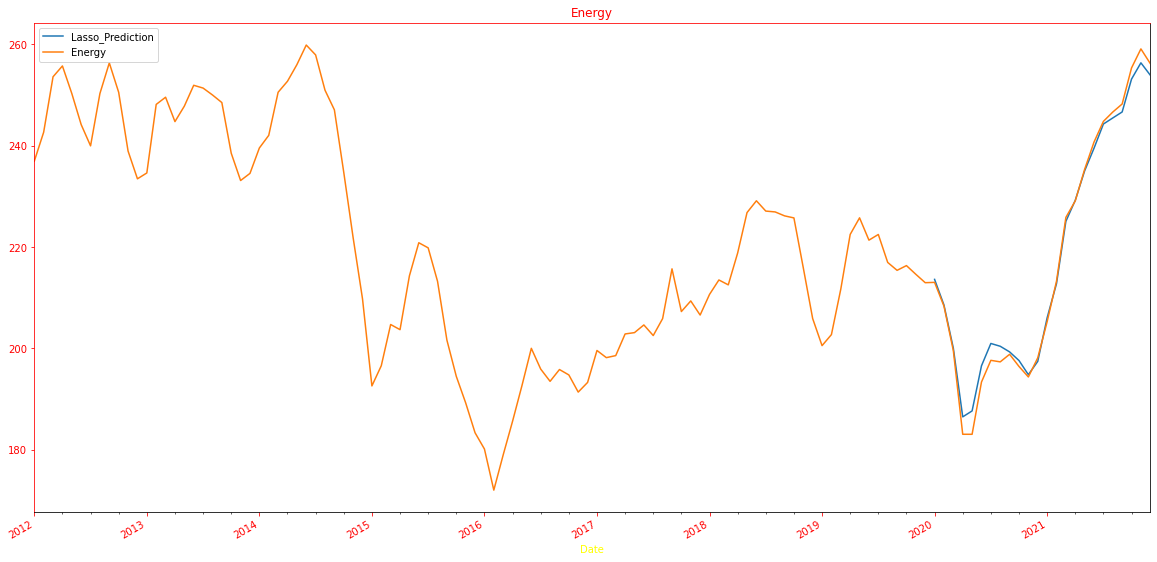

In [287]:

fig, ax = plt.subplots(1,1, sharex = False, sharey=True, figsize=(20,10))
preds['Lasso_Prediction'].plot(legend = True)
CPI['Energy'].sort_index().plot(legend = True)

# formatting
fig.autofmt_xdate()
ax.xaxis.label.set_color('yellow')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('blue')          #setting up Y-axis label color to blue
ax.set_xlabel('Date')
ax.tick_params(axis='x', colors='red')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='red')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('red')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('red')         #setting up above X-axis tick c
ax.set_title("Energy")
ax.title.set_color("red")
plt.show()

In [288]:
feature_df = pd.DataFrame({'category':model_lasso.feature_names_in_, 'weight': model_lasso.coef_}, columns= ['category', 'weight'] )
feature_df = feature_df.set_index('category').sort_values(by = 'weight', ascending = False)
feature_df = feature_df[feature_df.get('weight') != 0]
feature_df

,weight
category,
"Nondurables less food, beverages, and apparel",1.159931
Utilities and public transportation,0.135739
Fish and seafood,0.055539
Poultry,0.030606
Apples,0.027158
"Bacon, breakfast sausage, and related products",0.024705
Citrus fruits,0.023746
Potatoes,0.021286
Delivery services,0.020512


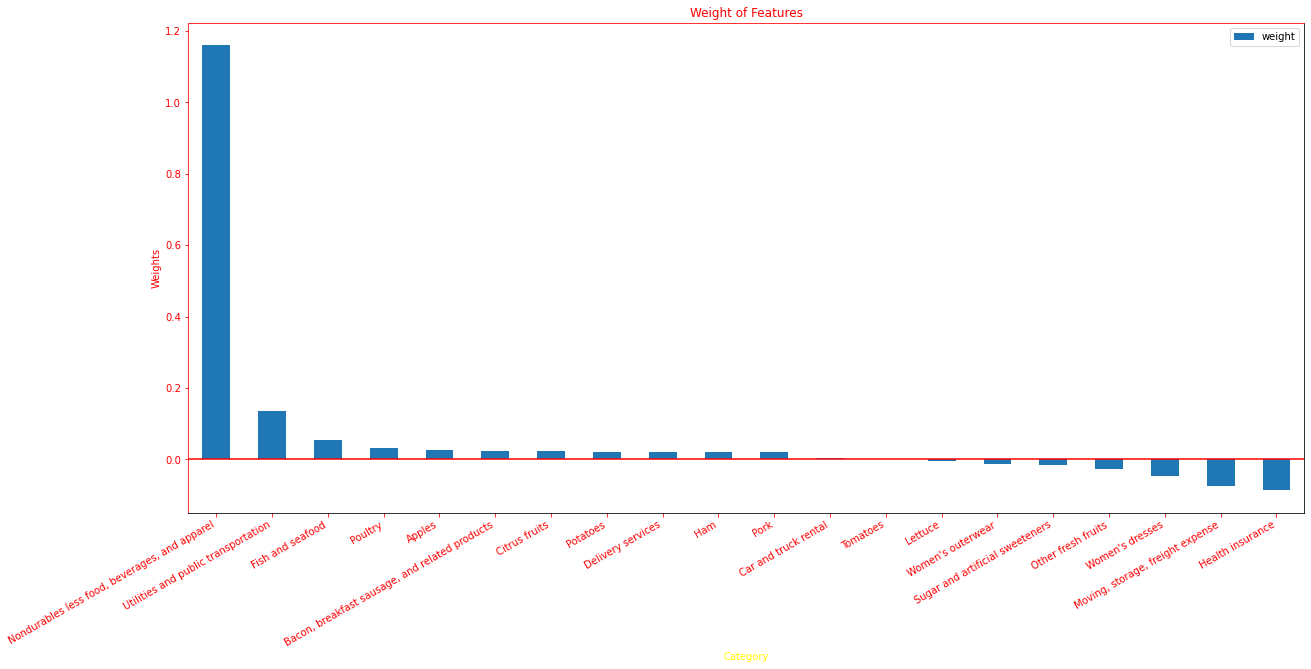

In [289]:
fig, ax2 = plt.subplots(1,1, sharex = False, sharey=True, figsize=(20,10))
feature_df.plot(kind = 'bar', ax = ax2)

# formatting
fig.autofmt_xdate()
ax2.xaxis.label.set_color('yellow')        #setting up X-axis label color to yellow
ax2.yaxis.label.set_color('red')          #setting up Y-axis label color to blue
ax2.set_xlabel('Category')
ax2.set_ylabel('Weights')
ax2.tick_params(axis='x', colors='red')    #setting up X-axis tick color to red
ax2.tick_params(axis='y', colors='red')  #setting up Y-axis tick color to black
plt.axhline(y=0, color='r', linestyle='-')
ax2.spines['left'].set_color('red')        # setting up Y-axis tick color to red
ax2.spines['top'].set_color('red')         #setting up above X-axis tick c
ax2.set_title("Weight of Features")
ax2.title.set_color("red")
plt.show()